In [71]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from utils.helpers import plot_results
from run import full_train_test

In [ ]:
times_dict = {'BCD': [], 'DFW': []}
accs_dict = {'BCD': [], 'DFW': []}

In [ ]:
N_TRAIN_SAMPLES = 60000
N_VALI_SAMPLES = 10000
N_ITER = 5
N_EPOCHS = 20
BATCH_SIZE = 500

for d in [500, 1000, 1500]:
    _, _, accuracy_test_array, time_array = full_train_test('DFW', N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER,
                                                            N_EPOCHS, BATCH_SIZE, verbose=True, d1=d, d2=d, d3=d)
    times_dict['DFW'].append(time_array)
    accs_dict['DFW'].append(accuracy_test_array)
    _, _, accuracy_test_array, time_array = full_train_test('BCD', N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER,
                                                            N_EPOCHS, verbose=True, d1=d, d2=d, d3=d)
    times_dict['BCD'].append(time_array)
    accs_dict['BCD'].append(accuracy_test_array)


Save results for reusing them later 

In [ ]:
with open('results/times.pkl',mode='wb') as f:
    pickle.dump(times_dict,f)
with open('results/accs.pkl',mode='wb') as f:
    pickle.dump(accs_dict,f)

load results

In [72]:
with open('results/times.pkl',mode='rb') as f:
    times_dict = pickle.load(f)
with open('results/accs.pkl',mode='rb') as f:
    accs_dict = pickle.load(f)

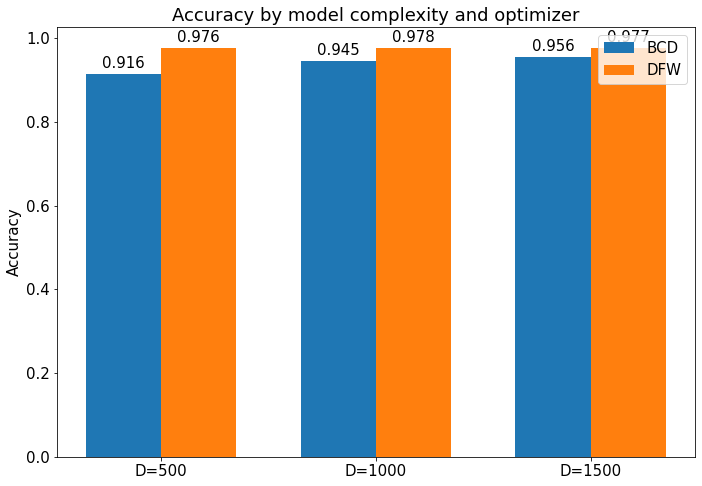

In [75]:
plot_results(accs_dict, ylabel='Accuracy', title='Accuracy by model complexity and optimizer',
                 filename='results/accuracies.pdf')

In [76]:
plot_results(times_dict, ylabel='Training time (s)', title='Training time by model complexity and optimizer',
                 filename='results/times.pdf')

IndexError: tuple index out of range